In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 8
%matplotlib inline

Ноутбук посвящен работе с геоданными с помощью библиотек shapely и geopandas. 

### Знакомство с shapely

`Shapely` - библиотека для работы с геометрическими объектами

`Geopandas` - pandas, только с гео

`folium` - для визуализации

In [2]:
from shapely.geometry import Point, LineString, Polygon

#### точка

In [3]:
moscow_lon = 37.618423
moscow_lat = 55.751244
point = Point(moscow_lon, moscow_lat)

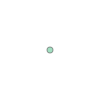

In [4]:
point

In [5]:
print("area ", point.area)
print("length ", point.length)

area  0.0
length  0.0


In [6]:
point.bounds

(37.618423, 55.751244, 37.618423, 55.751244)

#### Линия

In [7]:
moscow_lon = 37.618423
moscow_lat = 55.751244

piter_lon = 30.26417
piter_lat = 59.89444

line = LineString([(moscow_lon, moscow_lat), (piter_lon, piter_lat)])

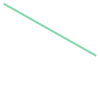

In [8]:
line

bounds - (minx, miny, maxx, maxy) 

In [9]:
line.bounds

(30.26417, 55.751244, 37.618423, 59.89444)

In [10]:
list(line.coords)

[(37.618423, 55.751244), (30.26417, 59.89444)]

#### Полигон

https://boundingbox.klokantech.com/ - сайт для создания bounding box города

In [11]:
polygon = Polygon([(37.3193289,55.489927), 
                   (37.9456611,55.489927),
                   (37.9456611,56.009657),
                   (37.3193289,56.009657)])
print(polygon.area)
print(polygon.length)

0.32552363430599734
2.2921243999999916


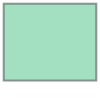

In [12]:
polygon

Границы полигона

In [13]:
polygon.bounds

(37.3193289, 55.489927, 37.9456611, 56.009657)

Для полигона, у которого внутри дырка, можно найти внутренние и внешние границы

In [14]:
list(polygon.exterior.coords)

[(37.3193289, 55.489927),
 (37.9456611, 55.489927),
 (37.9456611, 56.009657),
 (37.3193289, 56.009657),
 (37.3193289, 55.489927)]

In [15]:
list(polygon.interiors)

[]

### Операции с геометрией

<img src=http://docs.qgis.org/testing/en/_images/overlay_operations.png>

intersection

In [16]:
a = Point(0, 0).buffer(1.1)
b = Point(1, 1).buffer(0.7)

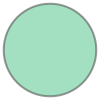

In [17]:
b

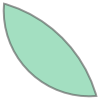

In [18]:
a.intersection(b)

union

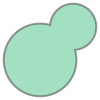

In [19]:
a.union(b)

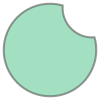

In [20]:
a.difference(b)

contains

In [21]:
polygon.contains(Point(moscow_lon, moscow_lat))

True

In [22]:
polygon.contains(Point(piter_lon, piter_lat))

False

### Geopandas

In [23]:
geo_series = gpd.GeoSeries([Point(-120, 45), Point(-121.2, 46), Point(-122.9, 47.5)])
geo_series

0    POINT (-120.00000 45.00000)
1    POINT (-121.20000 46.00000)
2    POINT (-122.90000 47.50000)
dtype: geometry

In [30]:
geo_series.crs = {'init': 'epsg:4326'}

/Users/ildar/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


#### GeoDataFrame

In [33]:
moscow_districts = gpd.read_file('moscow_districts.geojson')

In [34]:
moscow_districts.columns = moscow_districts.columns.str.lower()

In [35]:
moscow_districts.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,women18_55,womenolder,working_ag,geometry
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,14569.0,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875..."
1,ЗелАО,2277.0,11418.0,4116.0,Матушкино,15058.0,19196.0,44258.0,25062.0,6834.0,10948.0,10942.0,22366.0,"POLYGON ((37.17853 56.00795, 37.18083 56.00825..."
2,ЗАО,1054.0,5767.0,1614.0,Внуково,6399.0,9174.0,21378.0,12204.0,3436.0,5775.0,4785.0,11542.0,"MULTIPOLYGON (((37.18317 55.60565, 37.18455 55..."
3,ЗелАО,1628.0,8830.0,3540.0,Савёлки,12807.0,15214.0,35510.0,20296.0,5494.0,8379.0,9267.0,17209.0,"POLYGON ((37.20946 56.00083, 37.20975 56.00088..."
4,ЗелАО,1822.0,11186.0,4712.0,Силино,15518.0,19343.0,43495.0,24152.0,6587.0,10204.0,10806.0,21390.0,"POLYGON ((37.13160 56.01645, 37.13266 56.01678..."


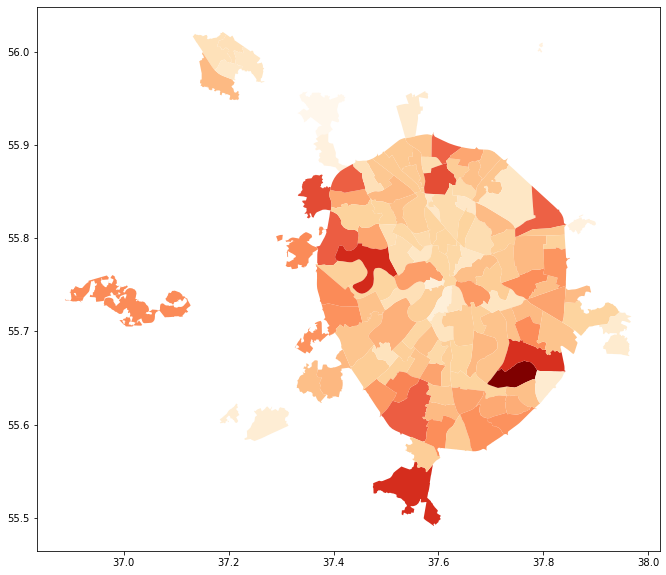

In [36]:
moscow_districts.plot('totalpopul', figsize=(12,10), cmap='OrRd');

#### OpenStreetMap

Скачаем данные по местам из OpenStreetMap на примере Москвы

https://wiki.openstreetmap.org/wiki/Main_Page

`node` - точка, параметры широта и долгота

`way` - линейные объекты, например улица, дорога

`relation` - отношение, для связи между объектами

In [37]:
import requests

https://wiki.openstreetmap.org/wiki/Map_Features - информация по категориям

In [38]:
overpass_url = "https://overpass.kumi.systems/api/interpreter"

overpass_query = """
[out:json];
(
 node["shop"](55.4245,37.0919,56.0671,38.1335);
);
out body;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [39]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.57.1 74a55df1',
 'osm3s': {'timestamp_osm_base': '2022-06-05T18:21:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 1000,
   'lat': 55.9951147,
   'lon': 37.2075319,
   'tags': {'comment': 'ООО "АСП-ГРУПП", ИНН 7735108290, до 22:45 c 2014-05-23',
    'name': 'Десяточка',
    'opening_hours': '08:30-22:45',
    'shop': 'supermarket'}},
  {'type': 'node',
   'id': 245868628,
   'lat': 55.9131682,
   'lon': 37.3961899,
   'tags': {'addr:city': 'Химки',
    'addr:housenumber': 'к4',
    'addr:postcode': '141410',
    'addr:street': 'микрорайон ИКЕА',
    'brand': 'Ашан',
    'brand:en': 'Auchan',
    'brand:ru': 'Ашан',
    'brand:wikidata': 'Q758603',
    'brand:wikipedia': 'ru:Auchan',
    'contact:facebook': 'https://www.facebook.com/AuchanRussia',
    'contact:instagram': 'https://www.instagram.com/auchan.ru/',
    'co

In [40]:
def get_tag(x, key_name):
    if str(key_name) in x:
        tmp = x[key_name]
        return tmp
    else:
        return "unknown"

In [41]:
loaded = pd.DataFrame(data['elements'])
loaded['shop'] = loaded['tags'].apply(lambda x: get_tag(x, 'shop'))

In [42]:
loaded.head()

,type,id,lat,lon,tags,shop
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket
2,node,245869056,55.912037,37.392914,"{'addr:city': 'Химки', 'addr:housenumber': 'к3...",doityourself
3,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes
4,node,249300822,55.634668,37.770433,"{'addr:housenumber': '20 к1', 'addr:street': '...",yes


#### Создание geodataframe

In [55]:
# crs = {'init':'epsg:4326'}
crs = 'epsg:4326'
geometry = [Point(xy) for xy in zip(loaded.lon, loaded.lat)]
places_geo = gpd.GeoDataFrame(loaded, crs=crs, geometry=geometry)

In [57]:
places_geo.head()

,type,id,lat,lon,tags,shop,geometry
0,node,1000,55.995115,37.207532,"{'comment': 'ООО ""АСП-ГРУПП"", ИНН 7735108290, ...",supermarket,POINT (37.20753 55.99511)
1,node,245868628,55.913168,37.396190,"{'addr:city': 'Химки', 'addr:housenumber': 'к4...",supermarket,POINT (37.39619 55.91317)
2,node,245869056,55.912037,37.392914,"{'addr:city': 'Химки', 'addr:housenumber': 'к3...",doityourself,POINT (37.39291 55.91204)
3,node,245942565,55.656054,38.068889,"{'amenity': 'fuel', 'fuel:diesel': 'yes', 'fue...",yes,POINT (38.06889 55.65605)
4,node,249300822,55.634668,37.770433,"{'addr:housenumber': '20 к1', 'addr:street': '...",yes,POINT (37.77043 55.63467)


### Spatial join

проверка проекций - у двух датафреймов они должны совпадать

In [58]:
moscow_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
places_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
places_district = gpd.sjoin(moscow_districts, places_geo, how="inner", predicate='contains')

In [62]:
places_district.head()

,abbrev_ao,men18_27,men18_60,menolder60,name,retirement,totalmen,totalpopul,totalwomen,under18,...,womenolder,working_ag,geometry,index_right,type,id,lat,lon,tags,shop
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",52447,node,9749102076,55.744811,37.498972,"{'contact:email': 'samsonov@aroma.ru', 'contac...",alcohol
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",14261,node,3848510364,55.744889,37.495447,"{'name': 'Up House', 'shop': 'mobile_phone'}",mobile_phone
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",21585,node,4602020193,55.744986,37.495388,"{'email': 'info@nicebike.ru', 'name': 'Nicebik...",bicycle
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",49971,node,9420896017,55.745103,37.490861,"{'inscription': 'Продукты', 'shop': 'convenien...",convenience
0,ЗАО,2550.0,15063.0,6621.0,Филёвский Парк,24272.0,26066.0,62378.0,36312.0,8474.0,...,17651.0,29632.0,"POLYGON ((37.42765 55.74821, 37.42849 55.74875...",49965,node,9420890922,55.745142,37.490836,"{'inscription': 'Овощи и Фрукты', 'shop': 'gre...",greengrocer


In [63]:
places_district['shop_count'] = places_district.groupby('name')['id'].transform('nunique')

In [64]:
district_stats = places_district[['name','geometry', 'shop_count', 'totalpopul']].drop_duplicates('name')#

<AxesSubplot:>

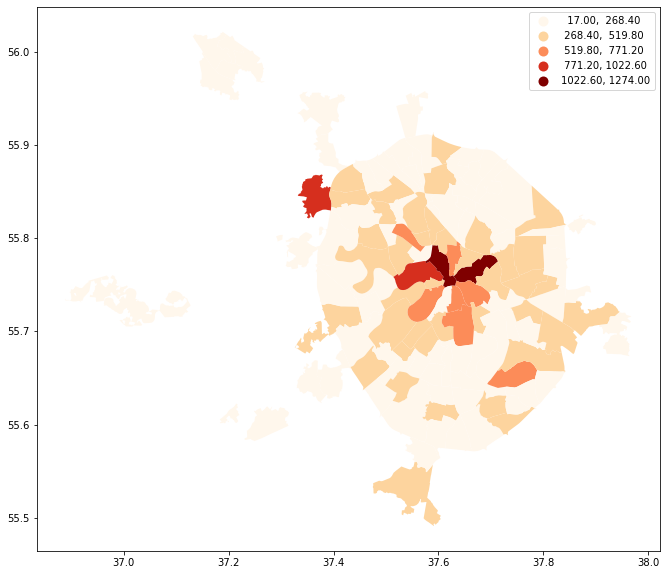

In [67]:
# district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equals', legend=True)
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='equalinterval', legend=True)

Изменим проекцию на Pseudo-Mercator EPSG:3857

In [68]:
district_stats = district_stats.to_crs(epsg=3857)

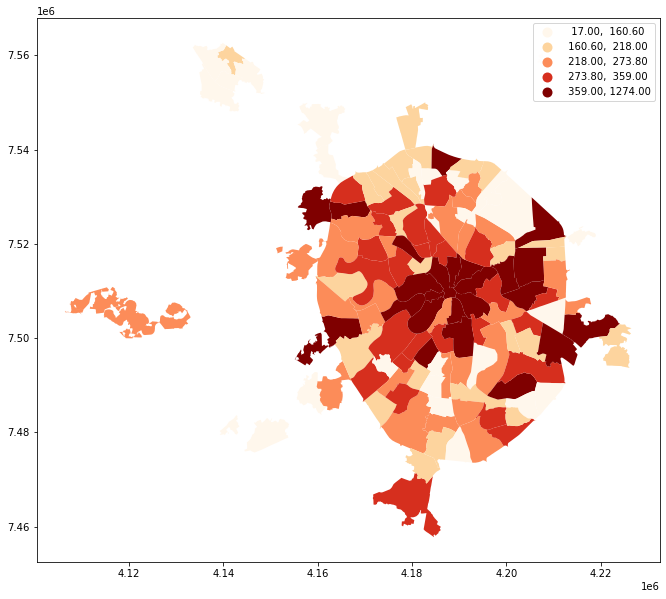

In [81]:
# dict_keys(['boxplot', 'equalinterval', 'fisherjenks', 'fisherjenkssampled', 'headtailbreaks', 'jenkscaspall', 
# 'jenkscaspallforced', 'jenkscaspallsampled', 'maxp', 'maximumbreaks', 'naturalbreaks', 'quantiles', 
# 'percentiles', 'stdmean', 'userdefined'])
district_stats.plot('shop_count', cmap='OrRd', figsize=(12,10), scheme='quantiles', legend=True);